## A regression example

For this example, we are going to use the BIWI head pose dataset, https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db. On pictures of persons, we have to find the center of their face. For the fastai docs, we have built a small subsample of the dataset (200 images) and prepared a dictionary for the correspondance filename to center.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [11]:
from fastai.vision import *
from fastai import *

import torch.nn as nn

In [3]:
biwi = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = pickle.load(open(biwi/'centers.pkl', 'rb'))

In [22]:
src = (PointsItemList.from_folder(biwi)
        .split_by_rand_pct(seed=42)
       .label_from_func(lambda o:fn2ctr[o.name]))
src

LabelLists;

Train: LabelList (160 items)
x: PointsItemList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: PointsLabelList
ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160)
Path: C:\Users\Tim\.fastai\data\biwi_sample;

Valid: LabelList (40 items)
x: PointsItemList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: PointsLabelList
ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160)
Path: C:\Users\Tim\.fastai\data\biwi_sample;

Test: None

In [ ]:
fn2ctr

In [29]:
imgp = fn2ctr[src.items[0].name]
imgp

tensor([84.0480, 84.8110])

In [30]:
imgp.reshape(-1)

tensor([84.0480, 84.8110])

In [33]:
src.y.items[0] = FloatTensor([[84,84.1]])

In [34]:
data = (src
        .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch(bs=128)
        .normalize(imagenet_stats))

In [39]:
data

ImageDataBunch;

Train: LabelList (160 items)
x: PointsItemList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: PointsLabelList
ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160)
Path: C:\Users\Tim\.fastai\data\biwi_sample;

Valid: LabelList (40 items)
x: PointsItemList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: PointsLabelList
ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160)
Path: C:\Users\Tim\.fastai\data\biwi_sample;

Test: None

In [41]:
data.train_ds.y.items[:3]

array([tensor([84.0480, 84.8110]), tensor([74.2108, 75.8180]), tensor([53.4167, 82.3089])], dtype=object)

In [23]:
learn = cnn_learner(data, models.resnet18, lin_ftrs=[100], ps=0.05)

In [24]:
lr = 1e-2

In [35]:
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,time
0,0.450458,0.377014,00:52
1,0.401036,0.423562,00:52
2,0.339685,0.410143,00:56
3,0.298255,0.421019,00:55
4,0.259388,0.334243,00:55


In [26]:
learn.save('mini_train')

In [33]:
img = data.valid_ds[1][0]
learn.predict(img)

(ImagePoints (120, 160), tensor([[0.5622, 0.6517]]), tensor([0.5622, 0.6517]))

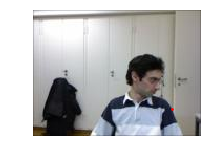

In [34]:
img.show(y=learn.predict(img)[0])